In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.sparse import find
import imutils
import cv2
import time

In [50]:
start = time.time()
i = 0

block_locations = []

#cap = cv2.VideoCapture(2)

X = 640; Y = 480 #Dimensions of camera feed
x, y = np.meshgrid(np.arange(0,X),np.arange(0,Y))
condition = (x < 10) | (x > X-10) | (y < 10) | (y > Y-10)

while(True):
    # Take each frame
    #_, frame = cap.read()
    frame = cv2.imread("demo_robot_identifier.PNG")
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    h = 348
    s = 0.28
    v = 0.95
    #green line h = 165°  s = 0.79 v = 0.64
    #blue blocks h = 210°, s = 0.52, v = 0.87
    #red line h = 1° s = 0.44  v = 0.93
    #purple circle h = 348°  s = 28 v = 95
    
    # define range of green color in HSV
    lower_green = np.array([(h-10)*0.5,255*max(s-0.2,0),255*max(v-0.2,0)])
    upper_green = np.array([(h+10)*0.5,255*min(s+0.2,1),255*min(v+0.2,1)])

    # Threshold the HSV image to get only blue colours
    image = cv2.inRange(hsv, lower_green, upper_green)
    #mask[condition] = 0  #Set edge of image to zero, generally not important

    #image = mask.copy()  or cv2.imread("mask.png")
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    #thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    some_image, cnts, hierarchy = cv2.findContours(blurred.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  #might have to do blurrey.copy()
    #need comma after hierarchy?
    
    if cnts:     #check for contours to make sure image isn't disconnected 
        block_locations = []
        block_areas = []
    
    # loop over the contours
    for c in cnts:

        # compute the center of the contour
        M = cv2.moments(c)

        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        #Update block locations list
        block_locations.append((cX,cY))
        block_areas.append(cv2.contourArea(c))

        # draw the contour and center of the shape on the image
        cv2.drawContours(hsv, [c], -1, (0, 255, 0), 1)
        cv2.circle(hsv, (cX, cY), 3, (255, 0, 255), -1)

        # show the image
        cv2.imshow("Image with locations", hsv)
        cv2.waitKey(5)
    
    # Bitwise-AND mask and original image
    #res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',blurred)
    #cv2.imshow('res',res)
    cv2.waitKey(5)

    #k = cv2.waitKey(1) & 0xFF
    #if k == 5:
    #    break
    i += 1

end = time.time()
print(end - start)    

cv2.destroyAllWindows()

KeyboardInterrupt: 

In [60]:
cap.release()
cv2.destroyAllWindows()
print(len(block_locations))

19


In [59]:
frame = cv2.imread("sample_arena_table_2.PNG")
    
# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

cv2.imshow("frame", frame)
cv2.imshow("Image hsv", hsv)
cv2.waitKey(5)

-1

-1

In [41]:
cv2.imwrite("mask.png", mask[condition])

True

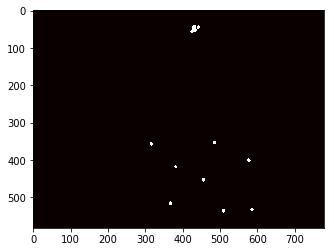

In [68]:
image = cv2.imread("mask.png")   #mask.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='hot')
plt.show()
some_image, cnts, hierarchy,  = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [54]:
block_locations = []

# loop over the contours
for c in cnts:

    # compute the center of the contour
    M = cv2.moments(c)

    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    #Update block locations list
    block_locations.append((cX,cY))
    
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 1)
    cv2.circle(image, (cX, cY), 3, (255, 0, 255), -1)

    # show the image
    cv2.imshow("Image", image)
    cv2.waitKey(5)

In [8]:
cv2.destroyAllWindows()
print(block_locations)

[(256, 184), (535, 182)]


In [12]:
# Colour required to identify features in format (H in degrees, S decimal, V decimal)
blue = (210, 0.52, 0.87)
red = (1, 0.44, 0.93)
green = (165, 0.79, 0.64)
purple = (0, 0, 0)  # Change! RGB 234, 12, 208
orange = (0, 0, 0)  # RGB 226, 183, 0

# Create dictionary of "colour": (lower_colour, upper_colour) where each are tuple len=3
colour_dict = {"purple": (((purple[0] - 10) * 0.5, 255 * max(purple[1] - 0.2, 0), 255 * max(purple[2] - 0.2, 0)), ((purple[0] + 10) * 0.5, 255 * min(purple[1] + 0.2, 1), 255 * min(purple[2] + 0.2, 1))), "blue": (((blue[0] - 10) * 0.5, 255 * max(blue[1] - 0.2, 0), 255 * max(blue[2] - 0.2, 0)), ((blue[0] + 10) * 0.5, 255 * min(blue[1] + 0.2, 1), 255 * min(blue[2] + 0.2, 1))), "green": (((green[0] - 10) * 0.5, 255 * max(green[1] - 0.2, 0), 255 * max(green[2] - 0.2, 0)), ((green[0] + 10) * 0.5, 255 * min(green[1] + 0.2, 1), 255 * min(green[2] + 0.2, 1))), "red": (((red[0] - 10) * 0.5, 255 * max(red[1] - 0.2, 0), 255 * max(red[2] - 0.2, 0)), ((red[0] + 10) * 0.5, 255 * min(red[1] + 0.2, 1), 255 * min(red[2] + 0.2, 1)))}


In [16]:
colour_dict["blue"]

((100.0, 81.60000000000001, 170.85), (110.0, 183.6, 255))

In [21]:
np.array(colour_dict["blue"][0])

array([100.  ,  81.6 , 170.85])

In [22]:
lower_green

array([100.  ,  81.6 , 170.85])

In [23]:
colour_dict = {"purple": (((purple[0] - 10) * 0.5, 255 * max(purple[1] - 0.2, 0), 255 * max(purple[2] - 0.2, 0)), ((purple[0] + 10) * 0.5, 255 * min(purple[1] + 0.2, 1), 255 * min(purple[2] + 0.2, 1))), "blue": (((blue[0] - 10) * 0.5, 255 * max(blue[1] - 0.2, 0), 255 * max(blue[2] - 0.2, 0)), ((blue[0] + 10) * 0.5, 255 * min(blue[1] + 0.2, 1), 255 * min(blue[2] + 0.2, 1))), "green": (((green[0] - 10) * 0.5, 255 * max(green[1] - 0.2, 0), 255 * max(green[2] - 0.2, 0)), ((green[0] + 10) * 0.5, 255 * min(green[1] + 0.2, 1), 255 * min(green[2] + 0.2, 1))), "red": (((red[0] - 10) * 0.5, 255 * max(red[1] - 0.2, 0), 255 * max(red[2] - 0.2, 0)), ((red[0] + 10) * 0.5, 255 * min(red[1] + 0.2, 1), 255 * min(red[2] + 0.2, 1)))}


In [25]:
colour_dict["purple"]

((-5.0, 0, 0), (5.0, 51.0, 51.0))